In [2]:
%load_ext autoreload
%autoreload 2

import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

sns.set_style('whitegrid')

sys.path.append("../")
from utility.ar1 import AR1
from utility.ar import AR

### SVD on Covariance Matrix

In [6]:
X = np.random.normal(0, 1, size=100).reshape(-1,1)

In [14]:
U,D,Vt = np.linalg.svd(X, full_matrices=False)

In [15]:
U.shape, D.shape, Vt.shape

((100, 1), (1,), (1, 1))

In [38]:
(U @ D.reshape(1,1)**2 @ U.T)

array([[ 0.79172229, -0.66303926, -0.70589391, ...,  0.71420048,
         0.52327327, -0.61965247],
       [-0.66303926,  0.5552718 ,  0.59116104, ..., -0.5981175 ,
        -0.43822275,  0.51893691],
       [-0.70589391,  0.59116104,  0.62936994, ..., -0.63677602,
        -0.46654669,  0.55247769],
       ...,
       [ 0.71420048, -0.5981175 , -0.63677602, ...,  0.64426925,
         0.47203675, -0.55897895],
       [ 0.52327327, -0.43822275, -0.46654669, ...,  0.47203675,
         0.34584717, -0.40954711],
       [-0.61965247,  0.51893691,  0.55247769, ..., -0.55897895,
        -0.40954711,  0.48497963]])

In [12]:
A = np.array([
    [1, -0.65, 0],
    [-0.65, 1+0.65**2, -0.65],
    [0, -0.65, 1]
])
S = np.linalg.inv(A)

D, U = np.linalg.eig(S)

In [39]:
np.round(np.linalg.inv(U @ np.diag(D + 1) @ U.T), 4)

array([[ 0.4472, -0.1625, -0.0528],
       [-0.1625,  0.5   , -0.1625],
       [-0.0528, -0.1625,  0.4472]])

In [29]:
np.round(np.linalg.inv(U @ np.diag(D) @ U.T), 4)

array([[ 1.    , -0.65  , -0.    ],
       [-0.65  ,  1.4225, -0.65  ],
       [-0.    , -0.65  ,  1.    ]])

### Linear Combination of Cacuchy

In [40]:
from scipy import stats

<AxesSubplot: ylabel='Density'>

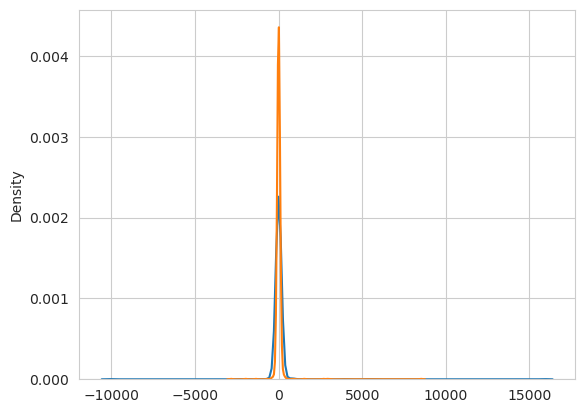

In [105]:
Z = stats.cauchy(loc=0, scale=1).rvs(size=(10, 1000))
sns.kdeplot(Z.sum(0))
sns.kdeplot(stats.cauchy(loc=0, scale=10).rvs(size=1000))

### Why Cauchy is Fatter tail than normal in AR(1)

In [119]:
def cauchy_factor(phi):
    return 1/(1 - np.abs(phi))**2

def normal_factor(phi):
    return 1/(1 - phi**2)

xs = np.linspace(-0.25, 0.25, 100000)

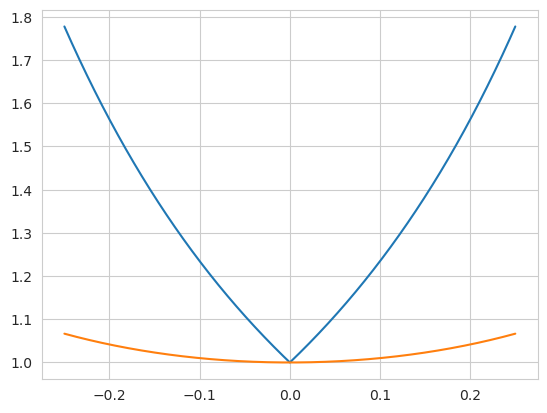

In [120]:
plt.plot(xs, cauchy_factor(xs))
plt.plot(xs, normal_factor(xs))